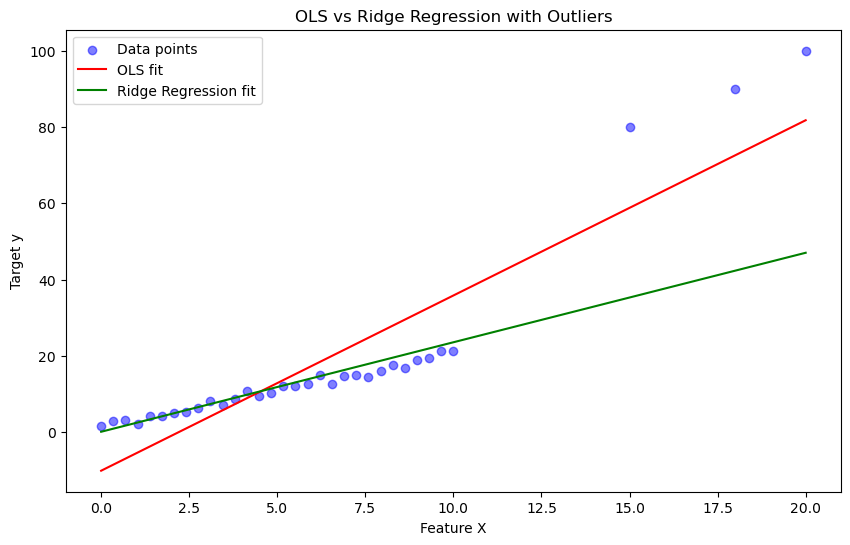

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(46)

#Generate simple linear dataset
n_samples = 30
X_input = np.linspace(0, 10, n_samples)
y = 2 * X_input + 1 + np.random.randn(n_samples)

#Add three impactful outliers
X_input = np.append(X_input, [15, 18, 20]) #farther from the x axis
y = np.append(y, [80, 90, 100]) #much higher y-values

#Add the intercept term
X = np.hstack([np.ones((n_samples + 3, 1)), X_input.reshape(-1, 1)])

#Comple the OLS and Ridge regression solutions
beta_OLS = np.linalg.inv(X.T @ X) @ X.T @ y
lambda_ridge = 1000
I= np.eye(X.shape[1])
beta_ridge = np.linalg.inv(X.T @ X + lambda_ridge * I) @ X.T @ y

#Prepare the plot
plt.figure(figsize=(10, 6))
plt.scatter(X_input, y, color='blue', alpha=0.5, label='Data points')

#Prepare the OLS fit
X_range = np.linspace(np.min(X_input), np.max(X_input), 100)
y_OLS = beta_OLS[0] + beta_OLS[1] * X_range
plt.plot(X_range, y_OLS, 'r-', label='OLS fit')

#Prepare the Ridge regression
y_ridge = beta_ridge[0] + beta_ridge[1] * X_range
plt.plot(X_range, y_ridge, 'g-', label='Ridge Regression fit')

plt.title('OLS vs Ridge Regression with Outliers')
plt.xlabel('Feature X')
plt.ylabel('Target y')
plt.legend()
plt.show()


In [3]:
beta_OLS

array([-9.51709014,  4.56822497])

In [4]:
beta_ridge

array([0.12833621, 2.36805118])